In [233]:
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.rcsetup as mrc

In [234]:
brfss = pd.read_csv("BRFSS_Clean_Combo.csv")

In [235]:
brfss.head()

,Unnamed: 0,Unnamed: 1,ID,YEAR,_LLCPWT2,IMONTH,B_ASTHMA,B_CANCER,B_CHCCOPD,B_ADDEPEV,...,L_AGEG5YR,L_SEX,L_IMPRACE,L_RACE,L_EMPLOY1,L_MARITAL,L_INCOMG,L_EDUCAG,L_BMI5CAT,L_IMONTH
0,LLCP2017.csv,0,20170,2017,185.477444,1,0,0,0,0,...,70-74,Female,White,White,Retired,Widowed,$35K - $50K,College Grad,25 - 30,January
1,LLCP2017.csv,1,20171,2017,185.477444,1,0,0,0,0,...,65-69,Male,White,White,Retired,Married,$50K+,College Grad,25 - 30,January
2,LLCP2017.csv,2,20172,2017,370.954888,1,0,0,0,0,...,70-74,Male,White,White,Retired,Married,,< HS,25 - 30,January
3,LLCP2017.csv,3,20173,2017,185.477444,2,0,0,1,1,...,70-74,Female,White,White,Retired,Widowed,<$15K,< HS,25 - 30,February
4,LLCP2017.csv,4,20174,2017,252.493865,1,1,0,1,0,...,65-69,Female,White,White,Unable,Widowed,<$15K,< HS,18.5 - 25,January


In [236]:
brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305720 entries, 0 to 1305719
Data columns (total 52 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1305720 non-null  object 
 1   Unnamed: 1  1305720 non-null  int64  
 2   ID          1305720 non-null  int64  
 3   YEAR        1305720 non-null  int64  
 4   _LLCPWT2    1305720 non-null  float64
 5   IMONTH      1305720 non-null  int64  
 6   B_ASTHMA    1305720 non-null  int64  
 7   B_CANCER    1305720 non-null  int64  
 8   B_CHCCOPD   1305720 non-null  int64  
 9   B_ADDEPEV   1305720 non-null  int64  
 10  B_DIABETE   1305720 non-null  int64  
 11  B_HEART     1305720 non-null  int64  
 12  COMORB_1    1305720 non-null  int64  
 13  TOTCHRONIC  1305720 non-null  int64  
 14  CHRONICGRP  1305720 non-null  int64  
 15  _STATE      1305720 non-null  int64  
 16  _AGEG5YR    1305720 non-null  int64  
 17  SEX         1304323 non-null  float64
 18  _IMPRACE    1305720 no

In [237]:
pd.crosstab(brfss["CHRONICGRP"], brfss["TOTCHRONIC"])

TOTCHRONIC,0,1,2,3,4,5,6
CHRONICGRP,,,,,,,
0,734870,0,0,0,0,0,0
1,0,374149,0,0,0,0,0
2,0,0,135267,0,0,0,0
3,0,0,0,45099,13236,2742,357


In [238]:
IPython_default = plt.rcParams.copy()

In [239]:
colors = mrc.cycler("color",
                        ["#EE6666", "#3388BB", "#9988DD", "#EECC55", "#88BB44", "#FFBBBB"])
plt.rc("axes", facecolor="#E6E6E6", edgecolor="none", axisbelow=True, grid=True, prop_cycle=colors)
plt.rc("grid", color="w", linestyle="solid")
plt.rc("xtick", direction="out", color="gray")
plt.rc("ytick", direction="out", color="gray")
#plt.rc("patch", edgecolor="#E6E6E6")
plt.rc("lines", linewidth=2)

<AxesSubplot:>

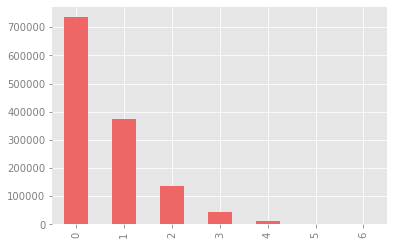

In [240]:
brfss["TOTCHRONIC"].value_counts().plot(kind = 'bar')

<AxesSubplot:>

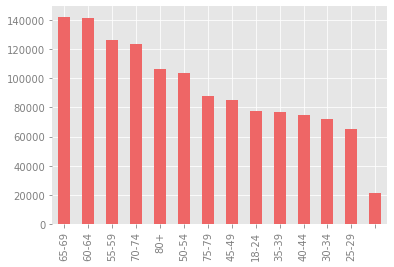

In [241]:
brfss["L_AGEG5YR"].value_counts().plot(kind = 'bar')

<AxesSubplot:>

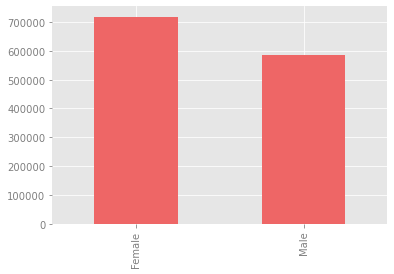

In [242]:
brfss["L_SEX"].value_counts().plot(kind = 'bar')

<AxesSubplot:>

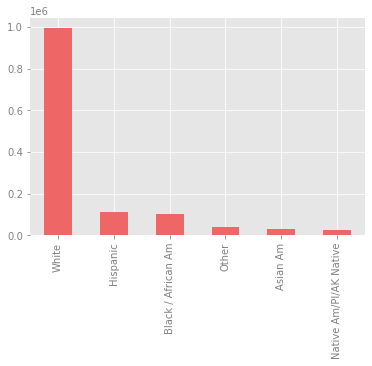

In [243]:
brfss["L_IMPRACE"].value_counts().plot(kind = 'bar')

<AxesSubplot:>

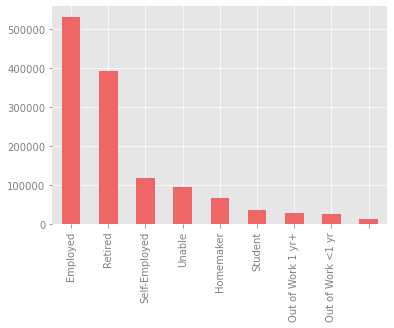

In [244]:
brfss["L_EMPLOY1"].value_counts().plot(kind = 'bar')

<AxesSubplot:>

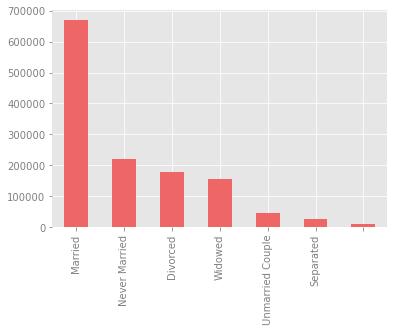

In [245]:
brfss["L_MARITAL"].value_counts().plot(kind = 'bar')

<AxesSubplot:>

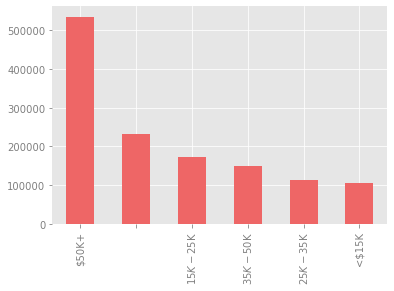

In [246]:
brfss["L_INCOMG"].value_counts().plot(kind = 'bar')

<AxesSubplot:>

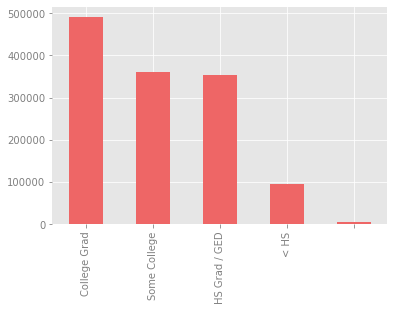

In [247]:
brfss["L_EDUCAG"].value_counts().plot(kind = 'bar')

<AxesSubplot:>

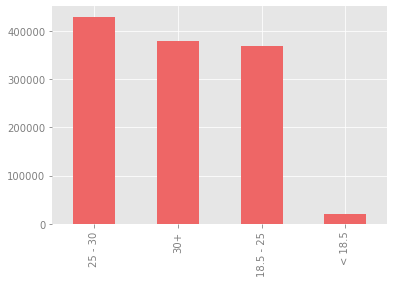

In [248]:
brfss["L_BMI5CAT"].value_counts().plot(kind = 'bar')

<AxesSubplot:>

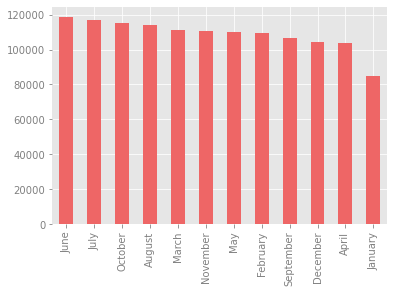

In [249]:
brfss["L_IMONTH"].value_counts().plot(kind = 'bar')

<AxesSubplot:>

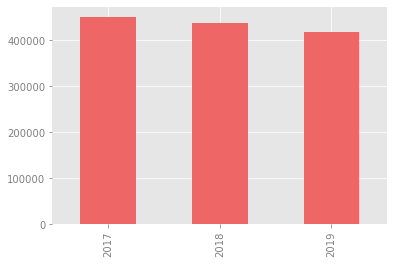

In [250]:
brfss["YEAR"].value_counts().plot(kind = 'bar')

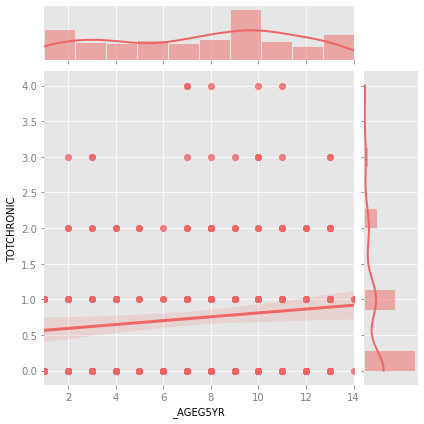

In [264]:
# Try again with a random sample; much better!
brfss["TOTCHRONIC"] = pd.to_numeric(brfss["TOTCHRONIC"], errors='coerce').fillna(0)
brfss["_AGEG5YR"] = pd.to_numeric(brfss["_AGEG5YR"], errors='coerce').fillna(0)
brfss["SEX"] = pd.to_numeric(brfss["SEX"], errors='coerce').fillna(0)
brfss["_BMI5CAT"] = pd.to_numeric(brfss["_BMI5CAT"], errors='coerce').fillna(0)
brfss_sample = brfss.sample(n=300)

sb.jointplot(data=brfss_sample, x="_AGEG5YR", y="TOTCHRONIC", kind="reg")

In [252]:
x = brfss_sample["_AGEG5YR"]
y = brfss_sample["TOTCHRONIC"]
m, b = np.polyfit(x, y, 1)
print("Slope: ", m)
print("Intercept: ", b)

Slope:  0.06991174885294965
Intercept:  0.036248848033366025


In [253]:
map_df_dup = brfss
mapme = map_df_dup.groupby(['_STATE','L_STATEAB', 'YEAR']).apply(lambda dfx: (dfx["TOTCHRONIC"] * dfx["_LLCPWT2"]).sum() / dfx["_LLCPWT2"].sum()).reset_index()
mapme = mapme.rename(columns = {'_STATE':'StateName', 'L_STATEAB':'StateAcronym', 'YEAR':'YEAR', 0:'Prop_Comorbidities'})
mapme

,StateName,StateAcronym,YEAR,Prop_Comorbidities
0,1,AL,2017,0.789213
1,1,AL,2018,0.812189
2,1,AL,2019,0.765866
3,2,AK,2017,0.513583
4,2,AK,2018,0.547640
...,...,...,...,...
153,66,GU,2018,0.416750
154,66,GU,2019,0.441507
155,72,PR,2017,0.651640
156,72,PR,2018,0.645511


In [254]:
# Thank you to Rachel for this code. :)
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
#print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

fig = px.choropleth(mapme,  # Input Pandas DataFrame
                    locations = "StateAcronym",  # DataFrame column with locations
                    color = "Prop_Comorbidities",  # DataFrame column with color values
                    color_continuous_scale = 'turbo',
                    hover_name = "StateName", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Proportion of Comorbidities in the US by State', # Create a Title
    geo_scope ='usa',  # Plot only the USA instead of globe
)
fig.show()  

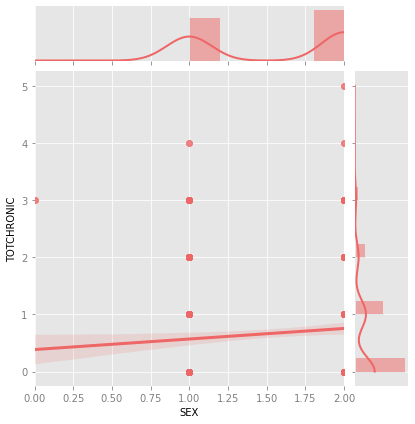

In [255]:
brfss_sample = brfss.sample(n=500)
sb.jointplot(data=brfss_sample, x="SEX", y="TOTCHRONIC", kind="reg")


In [256]:
x = brfss_sample["SEX"]
y = brfss_sample["TOTCHRONIC"]
m, b = np.polyfit(x, y, 1)
print("Slope: ", m)
print("Intercept: ", b)

Slope:  0.18457688591837018
Intercept:  0.3841207494575467


Slope:  -0.05599444674850981
Intercept:  0.943604666896165


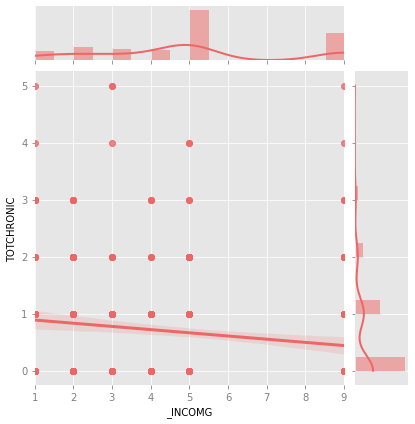

In [260]:
brfss_sample = brfss.sample(n=500)
sb.jointplot(data=brfss_sample, x="_INCOMG", y="TOTCHRONIC", kind="reg")
x = brfss_sample["_INCOMG"]
y = brfss_sample["TOTCHRONIC"]
m, b = np.polyfit(x, y, 1)
print("Slope: ", m)
print("Intercept: ", b)

Slope:  -0.12104991064850043
Intercept:  1.0761706267631155


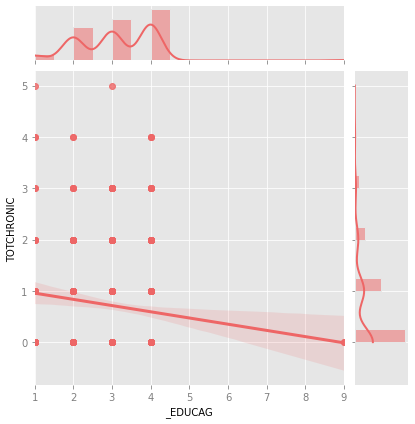

In [261]:
brfss_sample = brfss.sample(n=500)
sb.jointplot(data=brfss_sample, x="_EDUCAG", y="TOTCHRONIC", kind="reg")
x = brfss_sample["_EDUCAG"]
y = brfss_sample["TOTCHRONIC"]
m, b = np.polyfit(x, y, 1)
print("Slope: ", m)
print("Intercept: ", b)

Slope:  0.07759124596052418
Intercept:  0.4307966284954531


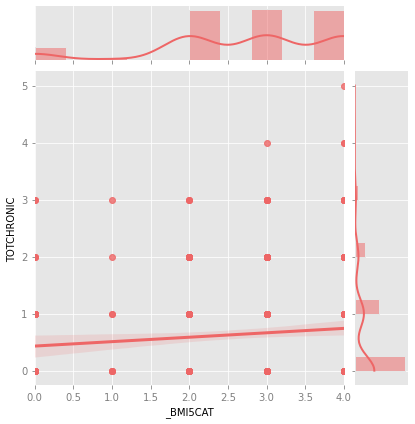

In [265]:
brfss_sample = brfss.sample(n=500)
sb.jointplot(data=brfss_sample, x="_BMI5CAT", y="TOTCHRONIC", kind="reg")
x = brfss_sample["_BMI5CAT"]
y = brfss_sample["TOTCHRONIC"]
m, b = np.polyfit(x, y, 1)
print("Slope: ", m)
print("Intercept: ", b)

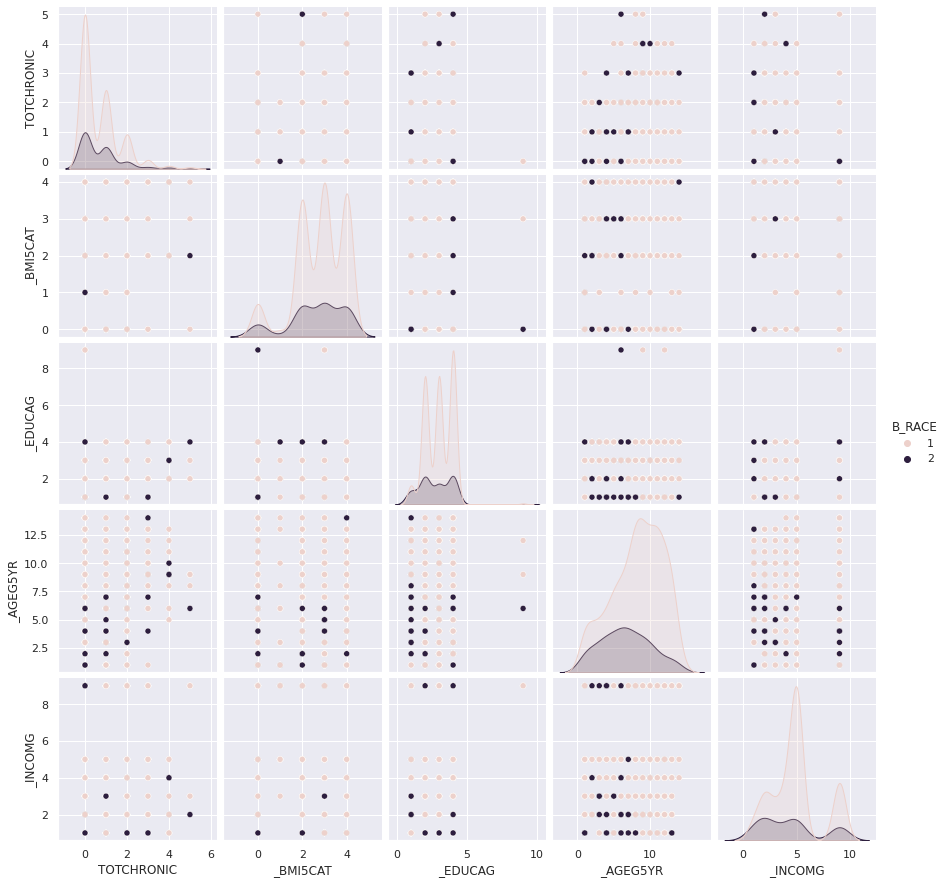

In [293]:
#Race: BIPOC less likely 2+ CCs, BIPOC younger, bimodal edu dist - either just HS, or college grad
# income less likely to be 50K+
brfss_sample = brfss.sample(n=1000)
brfss_s = pd.DataFrame(brfss_sample, columns=["TOTCHRONIC", "_BMI5CAT", "_EDUCAG", "_AGEG5YR", "_INCOMG", "B_RACE"])
sb.set()
sb.pairplot(brfss_s, hue="B_RACE", height=2.5)

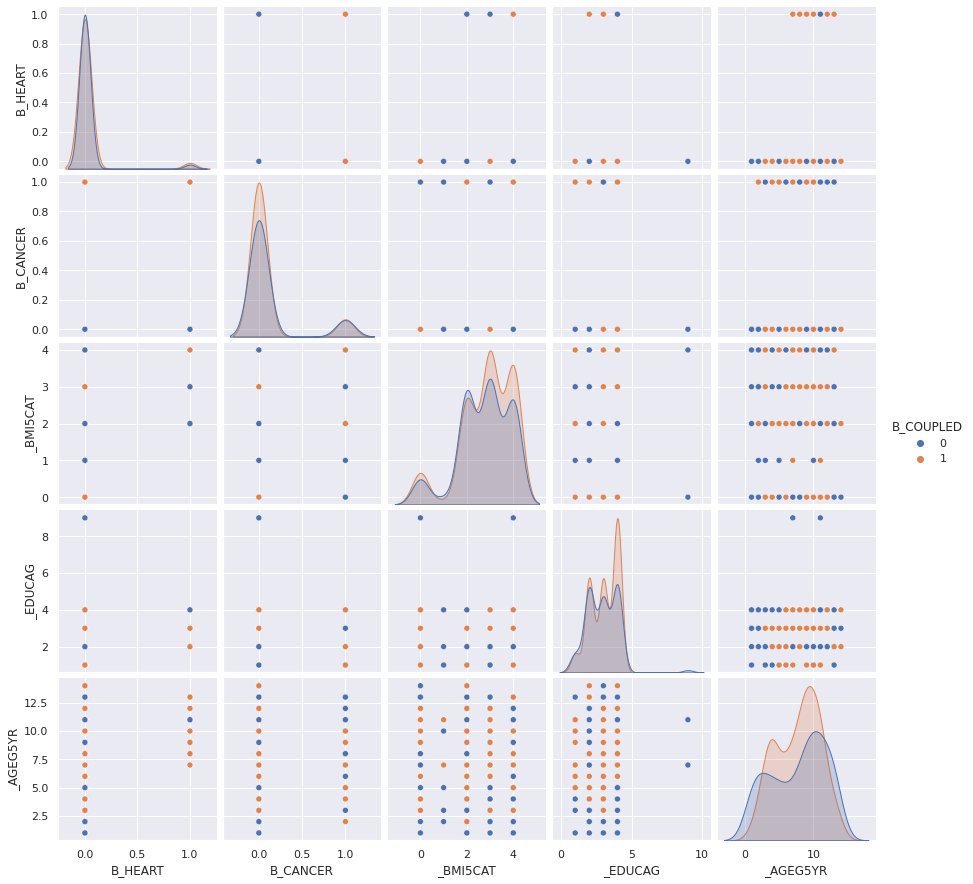

In [292]:
# Coupled: More likely elevated BMI, more education, die a little earlier
brfss_sample = brfss.sample(n=500)
brfss_s = pd.DataFrame(brfss_sample, columns=["B_HEART", "B_CANCER", "_BMI5CAT", "_EDUCAG", "_AGEG5YR", "B_COUPLED"])
sb.set()
sb.pairplot(brfss_s, hue="B_COUPLED", height=2.5)

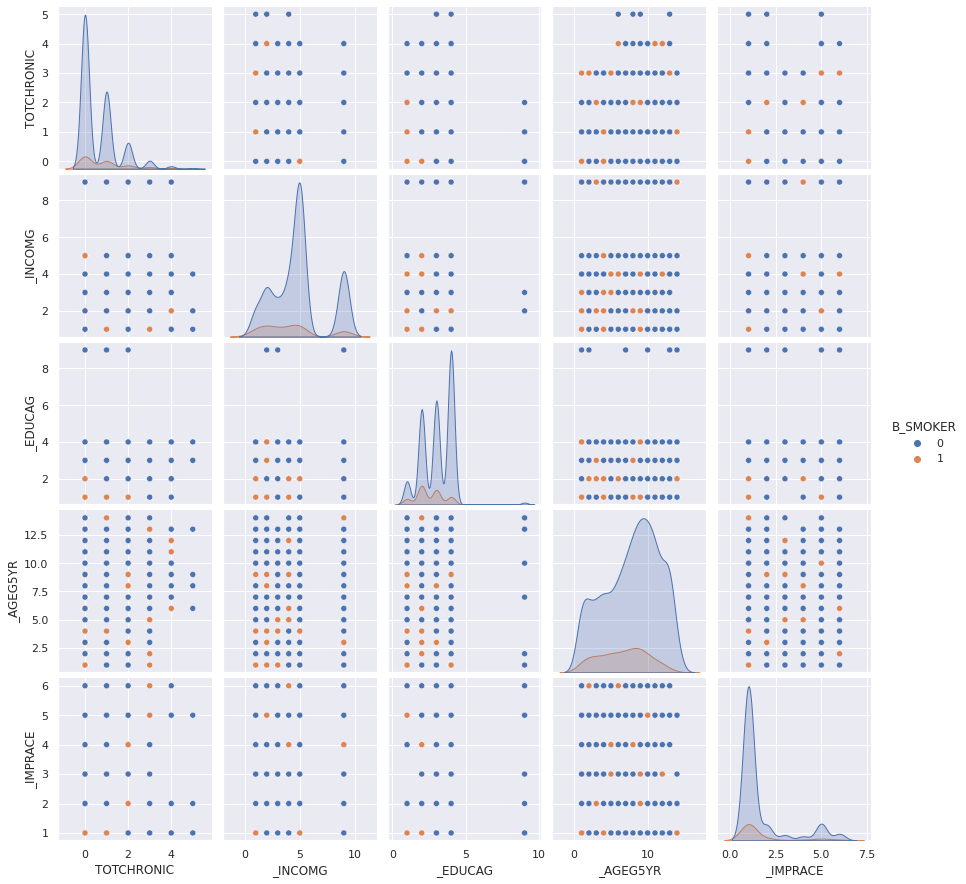

In [291]:
# Smoking: More CCs, Lower Income & Education, Life cut short
brfss_sample = brfss.sample(n=2500)
brfss_s = pd.DataFrame(brfss_sample, columns=["TOTCHRONIC", "_INCOMG", "_EDUCAG", "_AGEG5YR", "_IMPRACE", "B_SMOKER"])
sb.set()
sb.pairplot(brfss_s, hue="B_SMOKER", height=2.5)

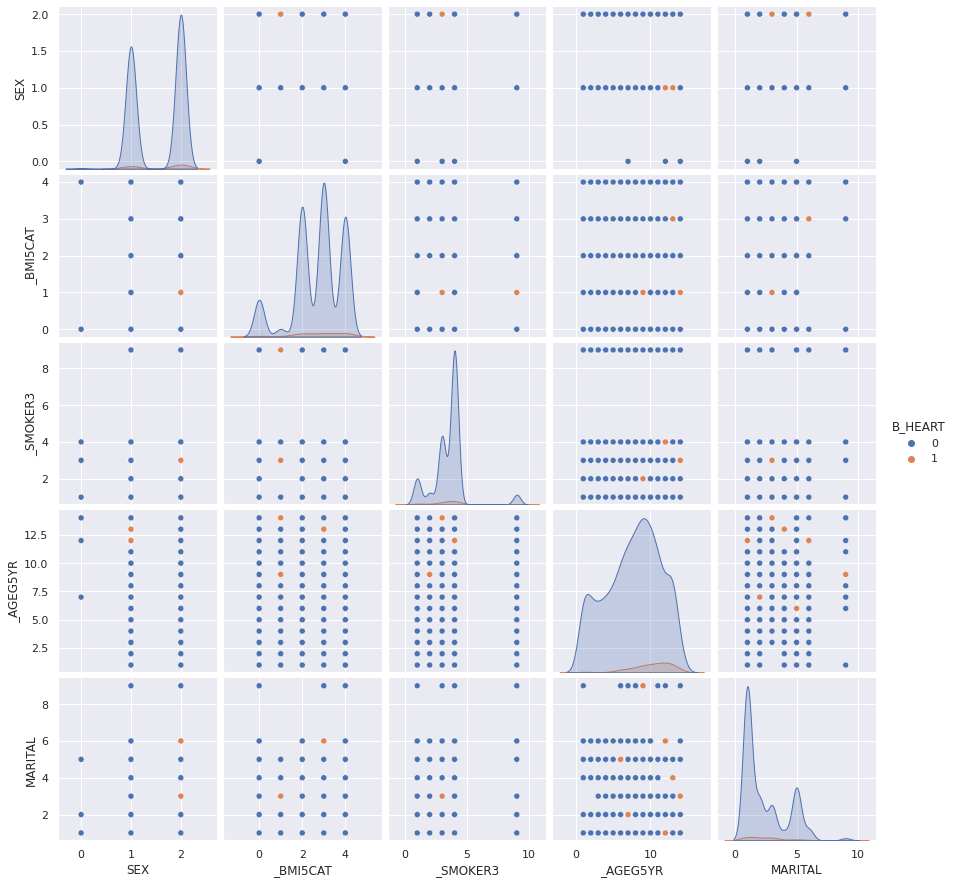

In [294]:
# Correlations with Heart Diseases: Female, Old age, former smoker
brfss_sample = brfss.sample(n=2500)
brfss_s = pd.DataFrame(brfss_sample, columns=["SEX", "_BMI5CAT", "_SMOKER3", "_AGEG5YR", "MARITAL", "B_HEART"])
sb.set()
sb.pairplot(brfss_s, hue="B_HEART", height=2.5)

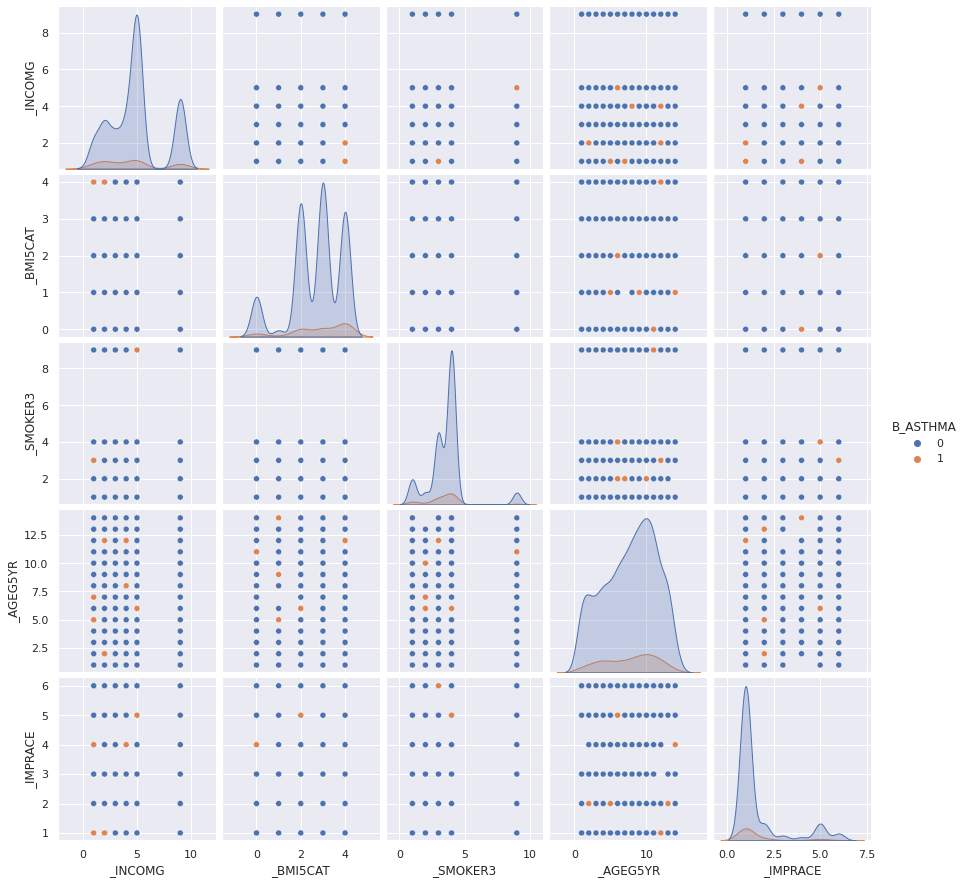

In [289]:
# Correlations with Asthma: BMI, Former Smoker, Shortened life-expectancy
brfss_sample = brfss.sample(n=2500)
brfss_s = pd.DataFrame(brfss_sample, columns=["_INCOMG", "_BMI5CAT", "_SMOKER3", "_AGEG5YR", "_IMPRACE", "B_ASTHMA"])
sb.set()
sb.pairplot(brfss_s, hue="B_ASTHMA", height=2.5)

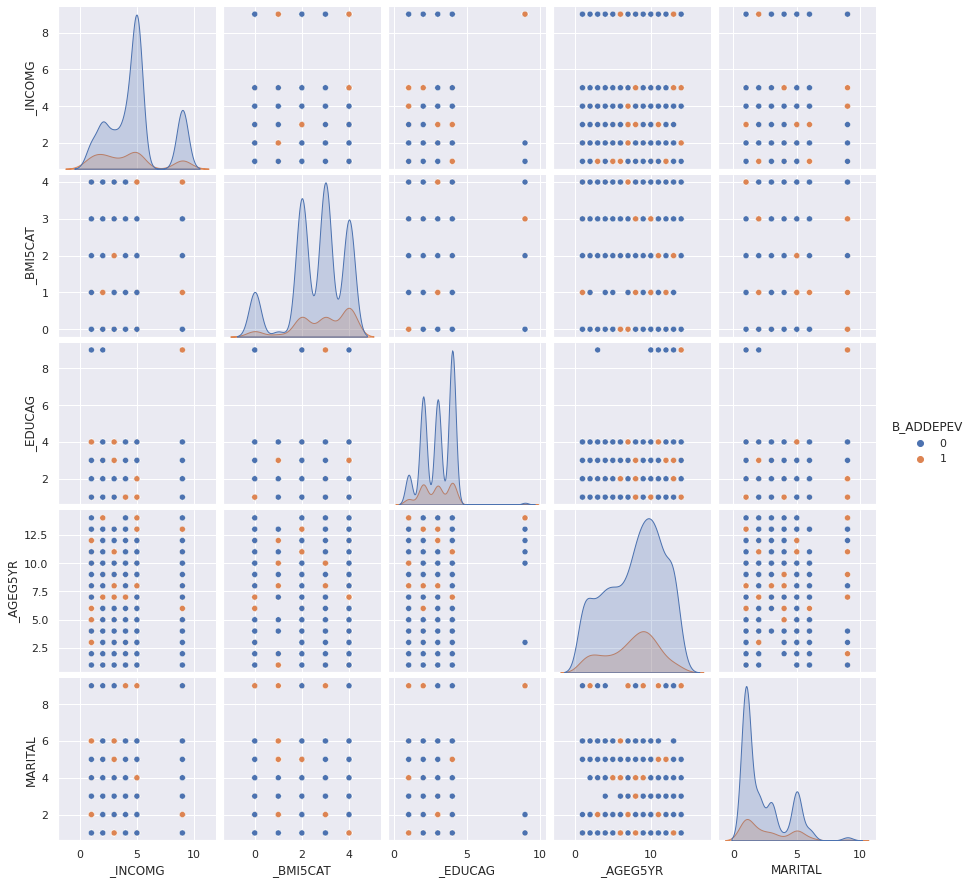

In [287]:
# Correlations with Depression: Both low and high income, High BMI, Middle age, Being married or in a relationship
brfss_sample = brfss.sample(n=2500)
brfss_s = pd.DataFrame(brfss_sample, columns=["_INCOMG", "_BMI5CAT", "_EDUCAG", "_AGEG5YR", "MARITAL", "B_ADDEPEV"])
sb.set()
sb.pairplot(brfss_s, hue="B_ADDEPEV", height=2.5)

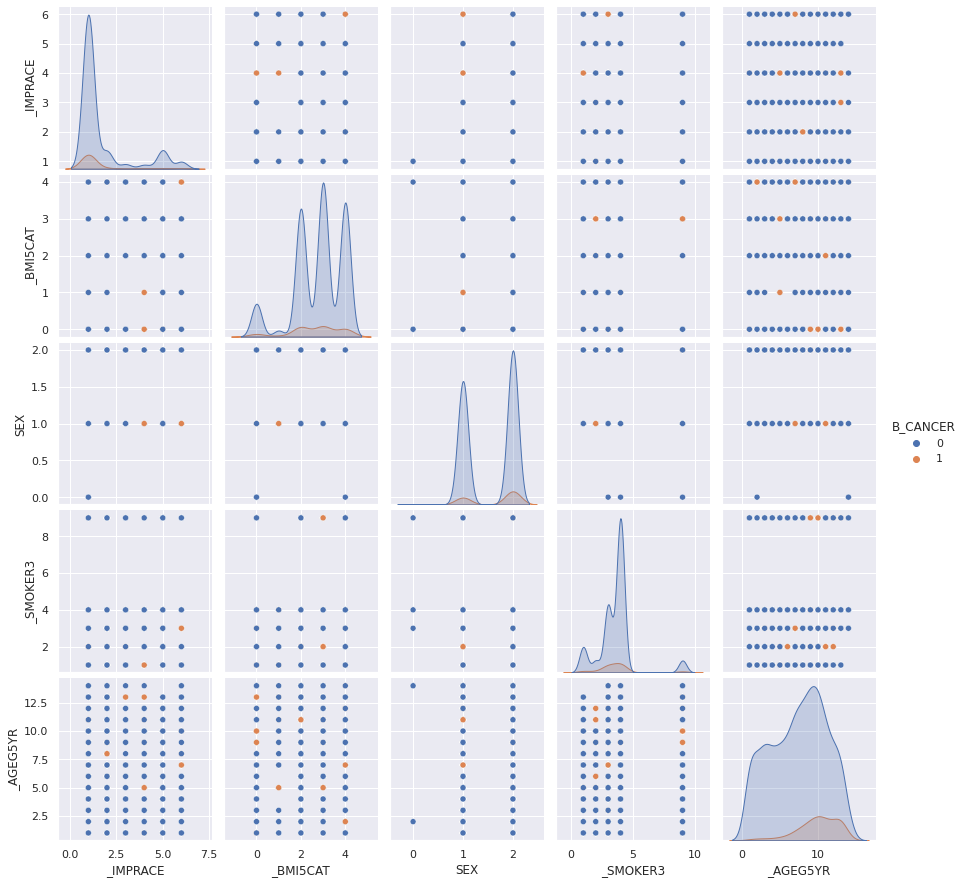

In [283]:
# Correlations with Cancer: Female, Former Smoker, Older Adult
brfss_sample = brfss.sample(n=2500)
brfss_s = pd.DataFrame(brfss_sample, columns=["_IMPRACE", "_BMI5CAT", "SEX", "_SMOKER3", "_AGEG5YR", "B_CANCER"])
sb.set()
sb.pairplot(brfss_s, hue="B_CANCER", height=2.5)

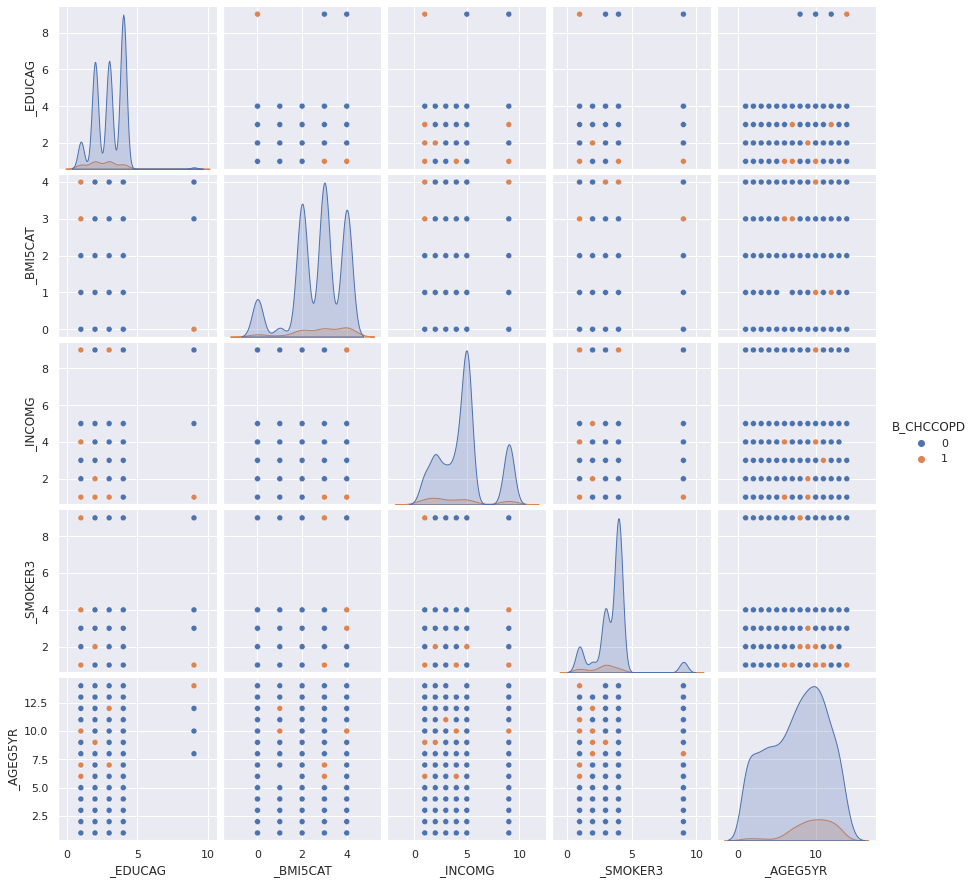

In [285]:
# Correlations with COPD
brfss_sample = brfss.sample(n=2500)
brfss_s = pd.DataFrame(brfss_sample, columns=["_EDUCAG", "_BMI5CAT", "_INCOMG", "_SMOKER3", "_AGEG5YR", "B_CHCCOPD"])
sb.set()
sb.pairplot(brfss_s, hue="B_CHCCOPD", height=2.5)

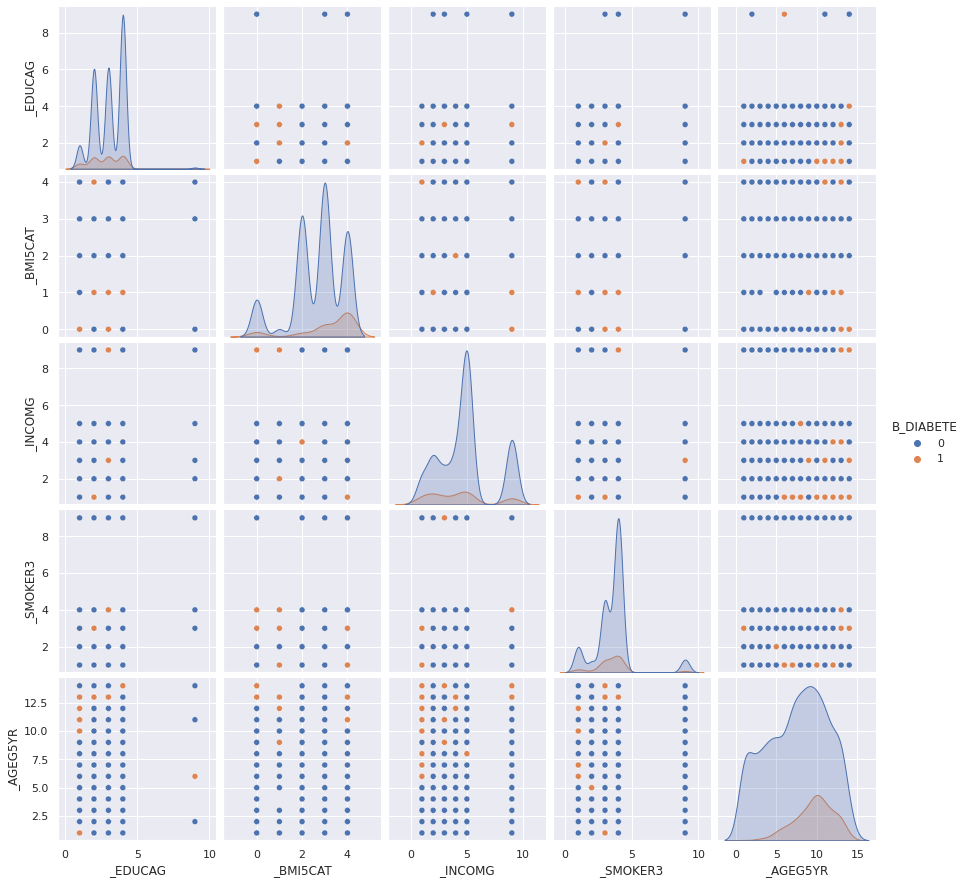

In [286]:
# Correlations with Diabetes: BMI, Former Smoker, Older Adult
brfss_sample = brfss.sample(n=2500)
brfss_s = pd.DataFrame(brfss_sample, columns=["_EDUCAG", "_BMI5CAT", "_INCOMG", "_SMOKER3", "_AGEG5YR", "B_DIABETE"])
sb.set()
sb.pairplot(brfss_s, hue="B_DIABETE", height=2.5)